# Simple gradient method

In [154]:
import matplotlib.pyplot as plt
import numpy as np

In [155]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

In [156]:
def himmelblau_gradient(x):
    x1, x2 = x[0], x[1]
    df_dx = 4 * x1 * (x1**2 + x2 - 11) + 2 * (x1 + x2**2 - 7)
    df_dy = 2 * (x1**2 + x2 - 11) + 4 * x2 * (x1 + x2**2 - 7)
    return np.array([df_dx, df_dy])

def ackley_gradient(x):
    x1, x2 = x[0], x[1]
    common_part_1 = 2 * 2**(0.5) *np.sqrt(x1**2 + x2**2)**(-0.5) * np.exp(-np.sqrt(2 * (x1**2 + x2**2)) / 10)
    common_part_2 = np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))
    df_dx = common_part_1 * x1 + np.pi * np.sin(2 * np.pi * x1) * common_part_2
    df_dy = common_part_1 * x2 + np.pi * np.sin(2 * np.pi * x2) * common_part_2
    return np.array([df_dx, df_dy])

## Algorithm

In [187]:
def simple_gradient(function, gradient, x, learning_rate, err=0.0001, max_iter=10000):
    algorithm_path = [x]

    for _ in range(max_iter):
        xnew = x - learning_rate * gradient(x)

        if np.linalg.norm(xnew - x) < err:
            break

        if function(xnew) > function(x):
            learning_rate /= 2 
        
        algorithm_path.append(xnew)
        x = xnew
        
    return x, np.array(algorithm_path)

In [157]:
def simple_gradient(function, gradient, x, learning_rate, err=0.0001, max_iter=10000, decay=0.9, improvement=0.0001, patience=50):
    algorithm_path = [x]
    last_improvement = 0
    best_function_value = function(x)

    for i in range(max_iter):
        xnew = x - learning_rate * gradient(x)
        new_function_value = function(xnew)

        if np.linalg.norm(xnew - x) < err:
            break
        
        if new_function_value < best_function_value - improvement:
            best_function_value = new_function_value
            last_improvement = i
            x = xnew
            algorithm_path.append(x)
        elif i - last_improvement > patience:
            learning_rate *= decay
            last_improvement = i
        
    return x, np.array(algorithm_path)

#### Checking whether the algorithm works near known minimums

In [158]:
# Himmelblau function
simple_gradient(himmelblau, himmelblau_gradient, np.array([3.1, 2.1]), 0.01)

(array([2.99866019, 2.0032239 ]),
 array([[3.1       , 2.1       ],
        [3.00176   , 2.04296   ],
        [2.99182455, 2.02755241],
        [2.99233369, 2.01964432],
        [2.99405506, 2.01441045],
        [2.99555879, 2.01065264],
        [2.99670728, 2.0078932 ],
        [2.99756114, 2.00585391],
        [2.99819286, 2.00434357],
        [2.99866019, 2.0032239 ]]))

In [159]:
# Ackley function
simple_gradient(ackley, ackley_gradient, np.array([0.1, 0.1]), 0.0001)

(array([0.00896305, 0.00896305]),
 array([[0.1       , 0.1       ],
        [0.09951159, 0.09951159],
        [0.09902436, 0.09902436],
        [0.09853833, 0.09853833],
        [0.0980535 , 0.0980535 ],
        [0.09756987, 0.09756987],
        [0.09708747, 0.09708747],
        [0.0966063 , 0.0966063 ],
        [0.09612637, 0.09612637],
        [0.09564768, 0.09564768],
        [0.09517025, 0.09517025],
        [0.09469409, 0.09469409],
        [0.0942192 , 0.0942192 ],
        [0.09374559, 0.09374559],
        [0.09327327, 0.09327327],
        [0.09280225, 0.09280225],
        [0.09233254, 0.09233254],
        [0.09186414, 0.09186414],
        [0.09139707, 0.09139707],
        [0.09093132, 0.09093132],
        [0.09046692, 0.09046692],
        [0.09000386, 0.09000386],
        [0.08954215, 0.08954215],
        [0.0890818 , 0.0890818 ],
        [0.08862282, 0.08862282],
        [0.08816522, 0.08816522],
        [0.08770899, 0.08770899],
        [0.08725416, 0.08725416],
        [0.086

## Creating functions for plot displaying

#### Create function for displaying 3d plots

In [160]:
def plot3d_function(function, color='plasma', x=np.linspace(-6, 6, 100), y=np.linspace(-6, 6, 100)):
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=color)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

#### Create function for displaying contour plots with colorbar

In [161]:
def plot_contour(function, gradient, starting_points, learning_rate=0.01, depth=50, color='plasma', x=np.linspace(-6, 6, 100), y=np.linspace(-6, 6, 100)):
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, depth, cmap=color)
    plt.colorbar(contour)
    plt.xlabel('x')
    plt.ylabel('y')

    for starting_point in starting_points:
        plt.plot(starting_point[0], starting_point[1], 'ko', zorder=5)
        path = simple_gradient(function, gradient, starting_point, learning_rate)[1]
        plt.plot(path[:, 0], path[:, 1], color='black', zorder=5)
        plt.plot(path[-1, 0], path[-1, 1], 'r.', zorder=5)
    plt.show()

## Testing the algorithm for multiple points with different `learning_rate` values

### 1. Himmelblau's function

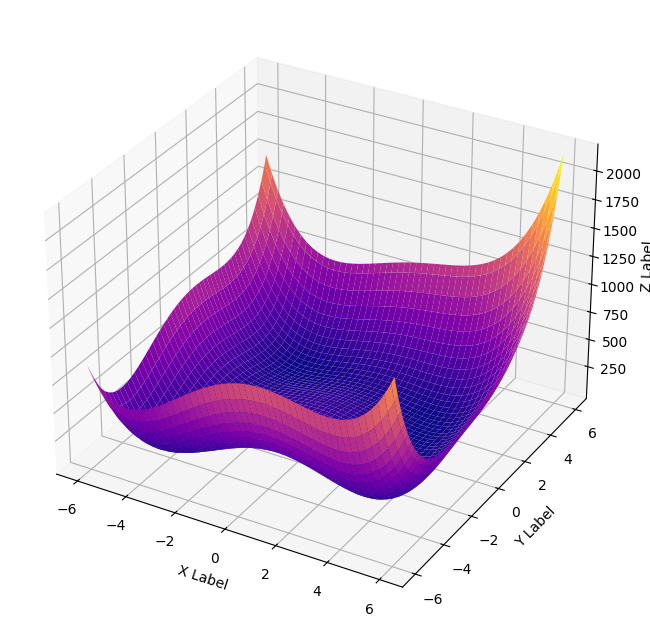

In [179]:
plot3d_function(himmelblau)

#### Creating starting points

In [180]:
np.random.seed(0)

starting_points = np.random.uniform(-5, 5, (30, 2))
starting_points[:5]

array([[ 0.48813504,  2.15189366],
       [ 1.02763376,  0.44883183],
       [-0.76345201,  1.45894113],
       [-0.62412789,  3.91773001],
       [ 4.63662761, -1.16558481]])

#### `learning_rate=0.01`

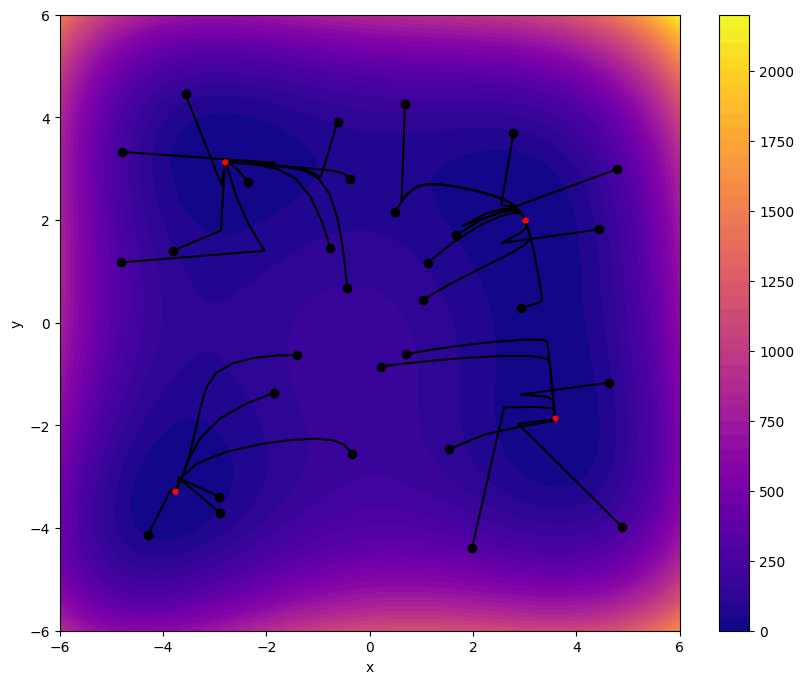

In [188]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=0.01, depth=50)

#### `learning_rate=0.001`

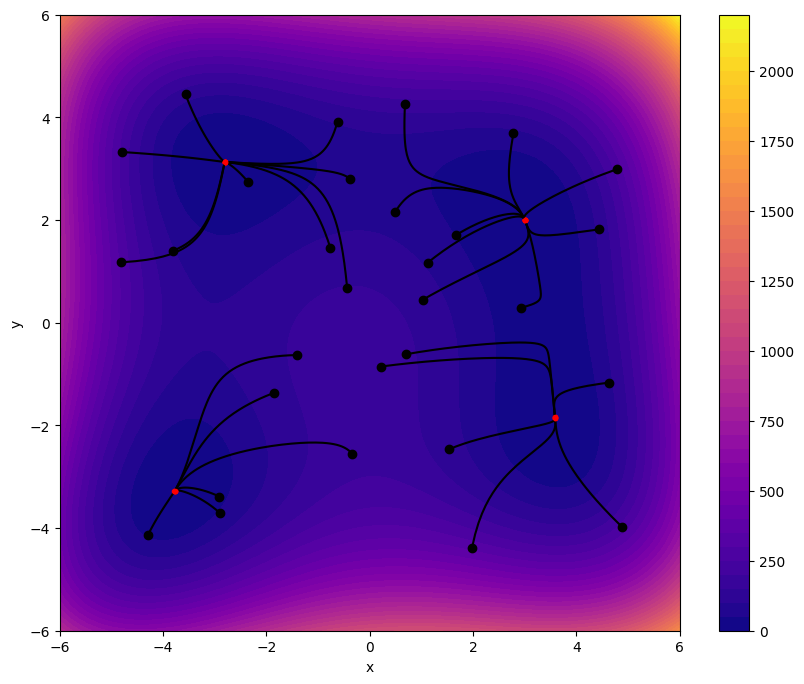

In [190]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=0.001, depth=50)

#### `learning_rate=0.0001`

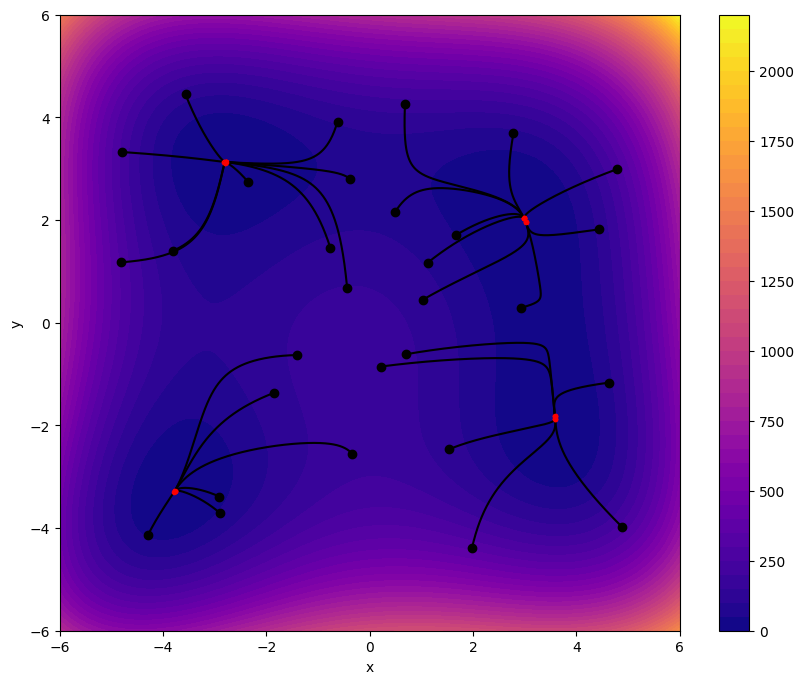

In [167]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=0.0001, depth=50)

#### `learning_rate=0.00001`

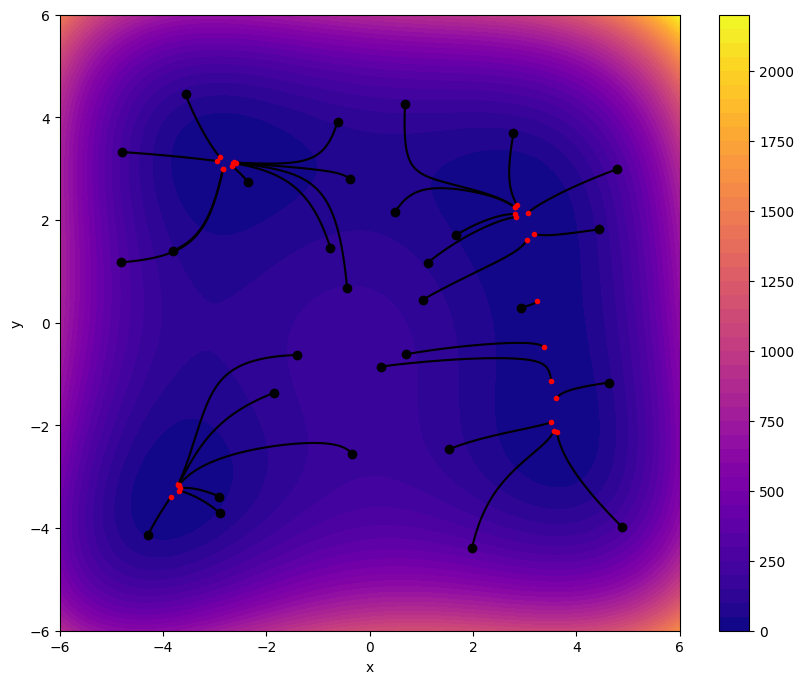

In [168]:
plot_contour(himmelblau, himmelblau_gradient, starting_points, learning_rate=0.00001, depth=50)

### 2. Ackley's function

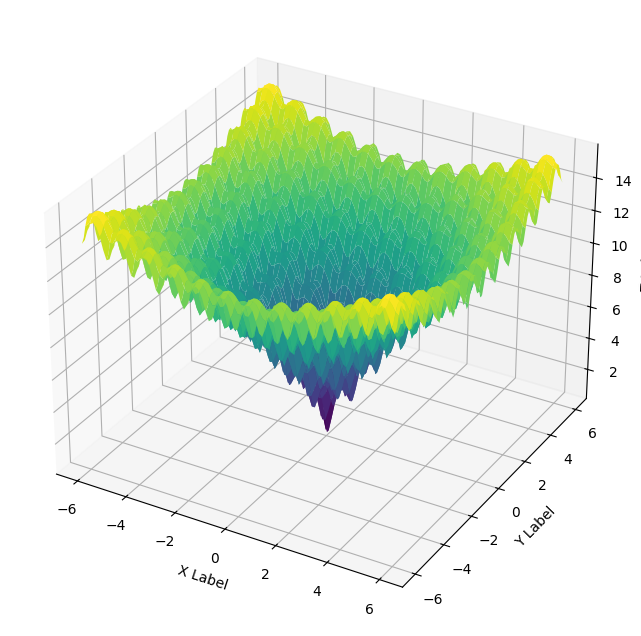

In [169]:
plot3d_function(ackley, color='viridis')

#### Creating starting points

In [193]:
np.random.seed(0)

starting_points = np.random.uniform(-5, 5, (100, 2))
starting_points[:5]

array([[ 0.48813504,  2.15189366],
       [ 1.02763376,  0.44883183],
       [-0.76345201,  1.45894113],
       [-0.62412789,  3.91773001],
       [ 4.63662761, -1.16558481]])

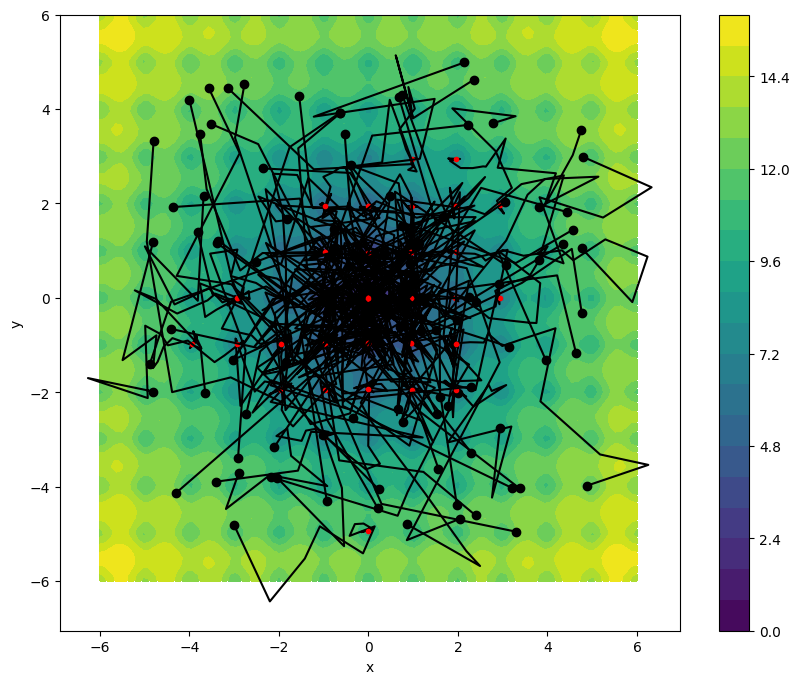

In [194]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.5, depth=20, color='viridis')

#### `learning_rate=0.01`

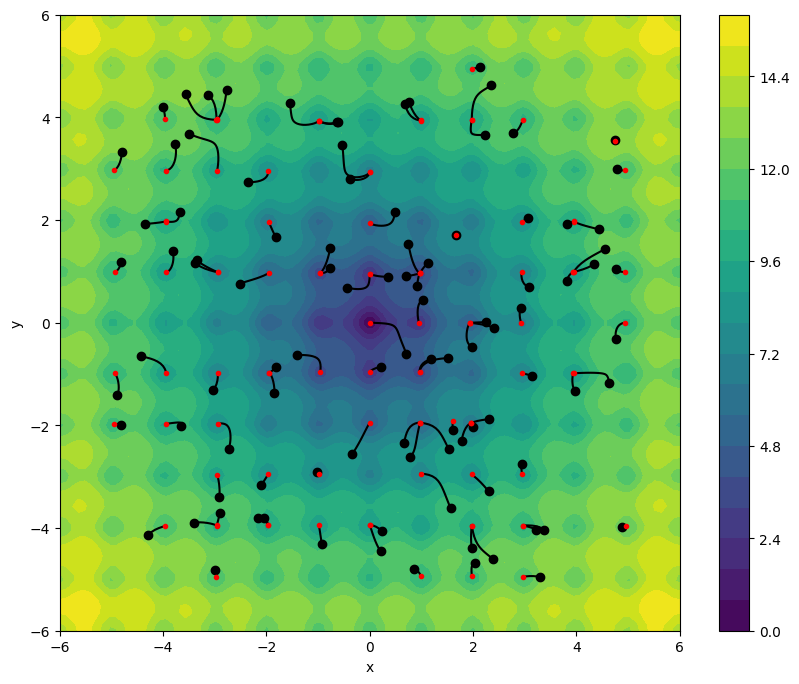

In [195]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.01, depth=20, color='viridis')

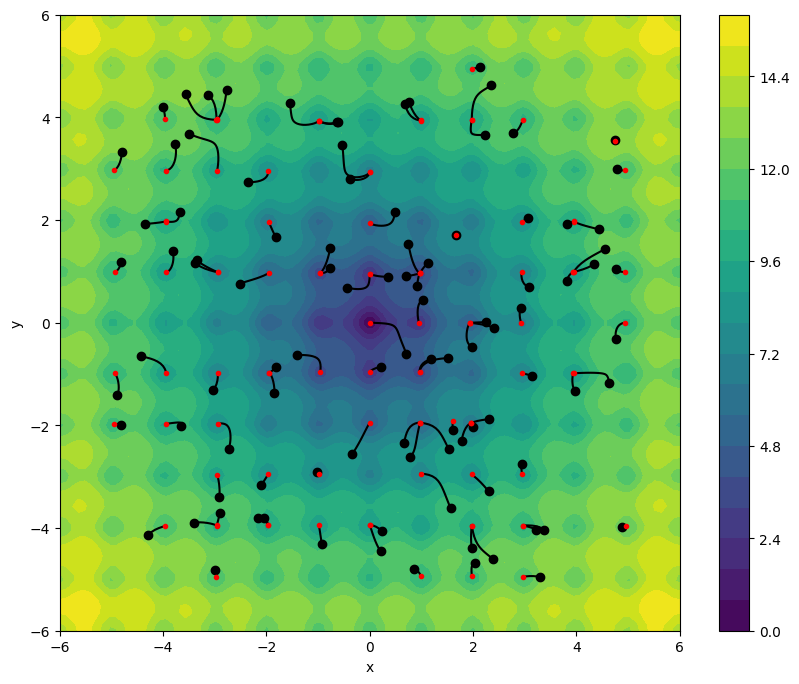

In [196]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.01, depth=20, color='viridis')

#### `learning_rate=0.001`

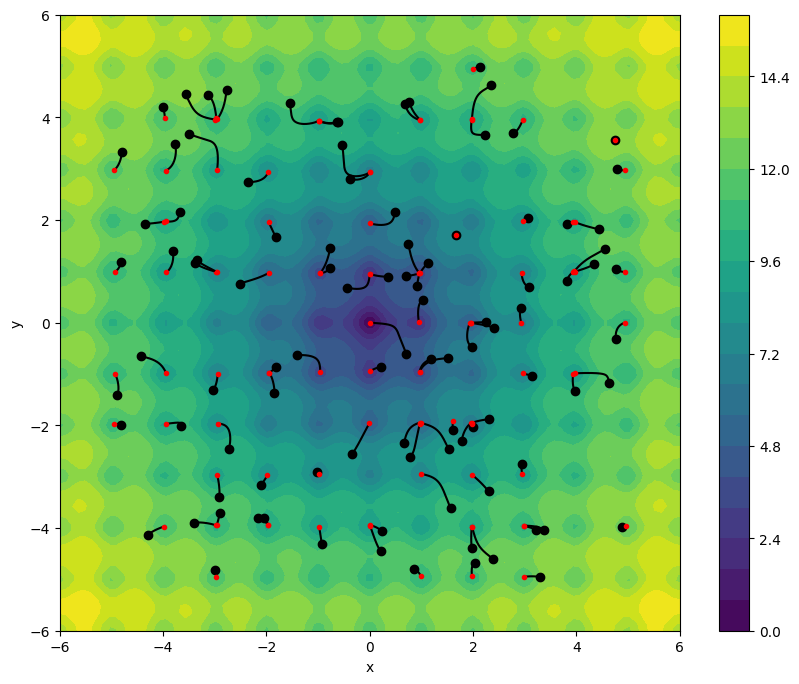

In [174]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.001, depth=20, color='viridis')

#### `learning_rate=0.0001`

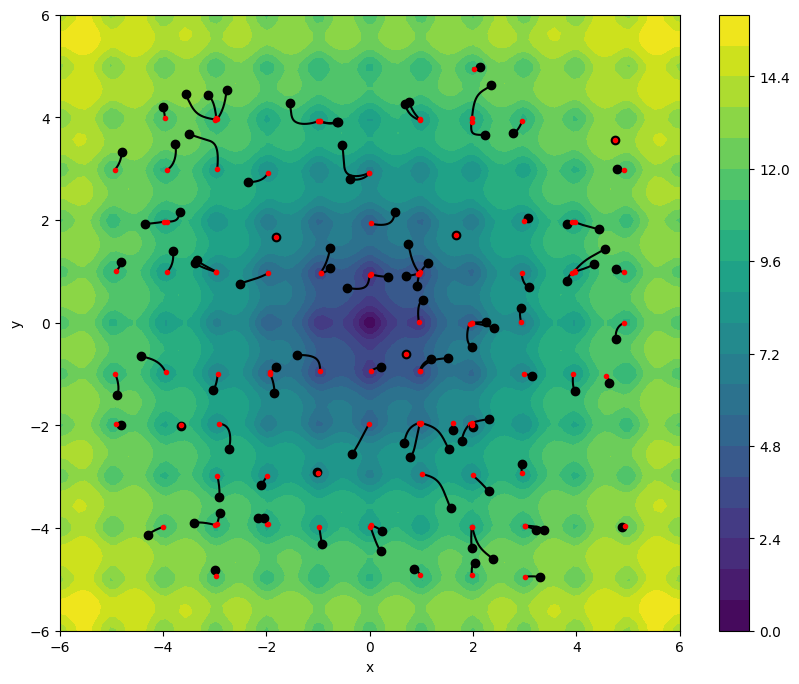

In [175]:
plot_contour(ackley, ackley_gradient, starting_points, learning_rate=0.0001, depth=20, color='viridis')